# **M11007320 電機碩一 黃旭輝 DEMO**


# 下載darknet和修改Makefile參數

In [1]:
# 下載darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.05 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [2]:
# 修改Makefile參數
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (itera

# 從github中下載所需檔案

In [3]:
# 從github中下載所需檔案
! git clone https://github.com/frankhuang1999/EdgeAI_Final.git

Cloning into 'EdgeAI_Final'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 41 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [4]:
# 將檔案複製到對應的路徑下方
!cp EdgeAI_Final/custom-yolov4-tiny-detector.cfg /content/darknet/cfg
!cp EdgeAI_Final/my_obj.names /content/darknet/data
!cp EdgeAI_Final/my_obj.data /content/darknet/data
!cp EdgeAI_Final/train.txt /content/darknet/data
!cp EdgeAI_Final/valid.txt /content/darknet/data
!cp EdgeAI_Final/custom-yolov4-tiny-detector_final.weights /content/darknet

# 影像測試

In [23]:
# 定義weights和test_img變數，共有3張test image可供測試
weights = "/content/darknet/custom-yolov4-tiny-detector_final.weights"
test_img = "/content/darknet/EdgeAI_Final/Test_Image/test_image_1.jpg"

In [24]:
# 測試
!./darknet detector test data/my_obj.data cfg/custom-yolov4-tiny-detector.cfg {weights} {test_img} -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    640 x 640 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x  64 1.887 BF
   3 route  2 		                       1/2 ->  160 x 160 x  32 
   4 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   5 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   6 route  5 4 	                           ->  160 x 160 x  64 
   7 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   8 route  2 7 	    

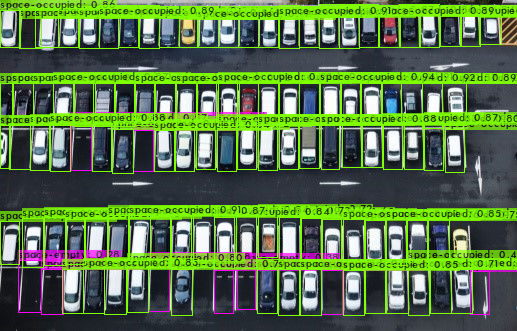

In [25]:
# 顯示測試結果
import cv2
from google.colab.patches import cv2_imshow
imgResult = cv2.imread('predictions.jpg')
cv2_imshow(imgResult)

# 相關資料下載

In [ ]:
# 預訓練weight
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
# PKLot Dataset
# !curl -L "https://public.roboflow.com/ds/LJHcLfiurP?key=ip8ogsu7W6" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# Train
# !./darknet detector train data/my_obj.data cfg/my_yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -map -dont_show